# Unsupervised Analysis

## Load libraries

In [1]:
%matplotlib inline
import numpy as np
from utils.helper import read_data, filter_gaussdxdx
import matplotlib.pyplot as plt
from scipy import signal
FOLDER = "data/"
NUMBER_OF_RADARS = 3
N_PICTURE = 64

## Load Data

In [2]:
data_empty = read_data(FOLDER + "empty.csv")
data_1p = read_data(FOLDER + "1p.csv")
data_2p = read_data(FOLDER + "2p.csv")
data_3p = read_data(FOLDER + "3p.csv")

Sum over frames

In [3]:
data_empty_summed = np.abs(np.sum(data_empty, axis=1)) 
data_1p_summed = np.abs(np.sum(data_1p, axis=1))
data_2p_summed = np.abs(np.sum(data_2p, axis=1))
data_3p_summed = np.abs(np.sum(data_3p, axis=1))

Remove static line

In [4]:
data_empty_summed[:, :, 32, :] = 0
data_1p_summed[:, :, 32, :] = 0
data_2p_summed[:, :, 32, :] = 0
data_3p_summed[:, :, 32, :] = 0
print("--------Shapes--------")
print(data_empty_summed.shape)
print(data_1p_summed.shape)
print(data_2p_summed.shape)
print(data_3p_summed.shape)


--------Shapes--------
(40, 3, 64, 64)
(60, 3, 64, 64)
(60, 3, 64, 64)
(80, 3, 64, 64)


In [5]:
N_FRAME = 30
KERNEL_FACTOR = 3
SIGMA = 5
DISTANCE = 3
THRESHOLD = 45

## Gauss dxdx filter

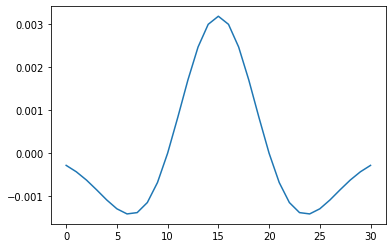

In [6]:
patch_to_plot = data_1p_summed[N_FRAME, 1, :, 2]
patch_filtered, filter = filter_gaussdxdx(patch_to_plot, kernel_factor=KERNEL_FACTOR, sigma=SIGMA)
plt.plot(filter)

## Example on some patch

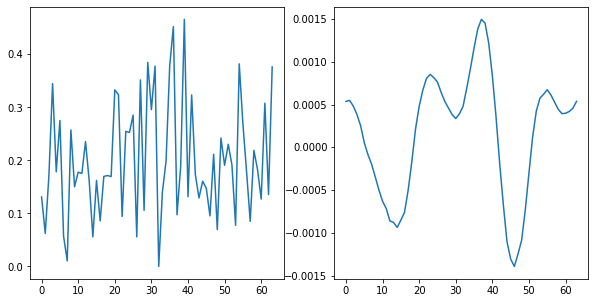

In [7]:
fig, axs = plt.subplots(1, 2, figsize = (10,5))
axs[0].plot(patch_to_plot)
axs[1].plot(patch_filtered)

### Empty

In [8]:
frame = data_empty_summed[N_FRAME]
peaks_n = []
peaks_n_per_radar_empty = []
for i in range(NUMBER_OF_RADARS):
    for j in range(N_PICTURE):
        patch = frame[i,:,j]
        patch_filtered, _ = filter_gaussdxdx(patch, kernel_factor=KERNEL_FACTOR, sigma=SIGMA)
        peak, _ = signal.find_peaks(patch_filtered, distance=DISTANCE)
        peak = peak[peak >= THRESHOLD]
        peaks_n.append(len(peak))
    peaks_n_per_radar_empty.append(np.mean(peaks_n))
print("Radar1, Radar2, Radar3")
print(peaks_n_per_radar_empty)

Radar1, Radar2, Radar3
[1.21875, 1.15625, 1.0989583333333333]


### 1 person

In [9]:
frame = data_1p_summed[N_FRAME]
peaks_n = []
peaks_n_per_radar_1p = []
for i in range(NUMBER_OF_RADARS):
    for j in range(N_PICTURE):
        patch = frame[i,:,j]
        patch_filtered, _ = filter_gaussdxdx(patch, kernel_factor=KERNEL_FACTOR, sigma=SIGMA)
        peak, _ = signal.find_peaks(patch_filtered, distance=DISTANCE)
        peak = peak[peak >= THRESHOLD]
        peaks_n.append(len(peak))
    peaks_n_per_radar_1p.append(np.mean(peaks_n))
print("Radar1, Radar2, Radar3")
print(peaks_n_per_radar_1p)

Radar1, Radar2, Radar3
[1.046875, 1.1484375, 1.1354166666666667]


### 2 persons

In [10]:
frame = data_2p_summed[N_FRAME]
peaks_n = []
peaks_n_per_radar_2p = []
for i in range(NUMBER_OF_RADARS):
    for j in range(N_PICTURE):
        patch = frame[i,:,j]
        patch_filtered, _ = filter_gaussdxdx(patch, kernel_factor=KERNEL_FACTOR, sigma=SIGMA)
        peak, _ = signal.find_peaks(patch_filtered, distance=DISTANCE)
        peak = peak[peak >= THRESHOLD]
        peaks_n.append(len(peak))
    peaks_n_per_radar_2p.append(np.mean(peaks_n))
print("Radar1, Radar2, Radar3")
print(peaks_n_per_radar_2p)

Radar1, Radar2, Radar3
[1.046875, 1.0703125, 1.03125]


### 3 persons

In [11]:
frame = data_3p_summed[N_FRAME]
peaks_n = []
peaks_n_per_radar_3p = []
for i in range(NUMBER_OF_RADARS):
    for j in range(N_PICTURE):
        patch = frame[i,:,j]
        patch_filtered, _ = filter_gaussdxdx(patch, kernel_factor=KERNEL_FACTOR, sigma=SIGMA)
        peak, _ = signal.find_peaks(patch_filtered, distance=DISTANCE)
        peak = peak[peak >= THRESHOLD]
        peaks_n.append(len(peak))
    peaks_n_per_radar_3p.append(np.mean(peaks_n))
print("Radar1, Radar2, Radar3")
print(peaks_n_per_radar_3p)

Radar1, Radar2, Radar3
[0.984375, 0.9921875, 1.015625]


Comparison of all

In [13]:
print("     Radar1,   Radar2,    Radar3")
print("0: ",peaks_n_per_radar_empty)
print("1: ",peaks_n_per_radar_1p)
print("2: ",peaks_n_per_radar_2p)
print("3: ",peaks_n_per_radar_3p)

  Radar1,   Radar2,    Radar3
0:  [1.21875, 1.15625, 1.0989583333333333]
1:  [1.046875, 1.1484375, 1.1354166666666667]
2:  [1.046875, 1.0703125, 1.03125]
3:  [0.984375, 0.9921875, 1.015625]
